The objective of analysis of this DataSet is to determine the impact of Covid-19 in different Countries and to provide a visuallization of the analysis.

Source of the Datasets from Kaggle:
1)Uncover DataSet used for the uncover challenge.
2)novel-corona-virus-2019-dataset from Kaggle
3)coronavirusdataset
4)patient




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly
import plotly.graph_objs as go
import plotly.offline as py
import plotly.express as px
py.init_notebook_mode(connected=True)

In [2]:
who_data=pd.read_csv('world-health-organization-who-situation-reports.csv')
new_york_times=pd.read_csv('covid-19-state-level-data.csv')
new_york_times

date          state  fips  cases  deaths
0     2020-01-21     Washington    53      1       0
1     2020-01-22     Washington    53      1       0
2     2020-01-23     Washington    53      1       0
3     2020-01-24       Illinois    17      1       0
4     2020-01-24     Washington    53      1       0
...          ...            ...   ...    ...     ...
3089  2020-04-27       Virginia    51  13535     458
3090  2020-04-27     Washington    53  13864     771
3091  2020-04-27  West Virginia    54   1077      37
3092  2020-04-27      Wisconsin    55   6081     281
3093  2020-04-27        Wyoming    56    389       7

[3094 rows x 5 columns]

In [3]:
who_data.isnull().sum()

date               0
location           0
new_cases        160
new_deaths      2327
total_cases        0
total_deaths    2280
dtype: int64

In [4]:
who_data.dropna(subset=['total_deaths','new_cases','new_deaths'],inplace=True)

Text(0, 0.5, 'Number Of Cases')

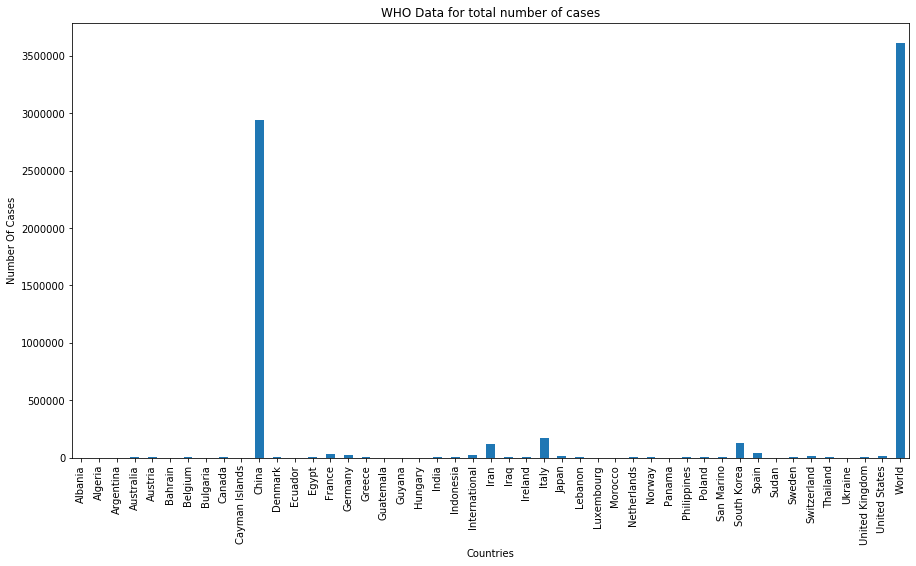

In [5]:
death_count_who=who_data.groupby('location')['total_cases'].sum()
plot1=death_count_who.plot.bar(figsize=(15,8))
plot1.set_title('WHO Data for total number of cases')
plot1.set_xlabel('Countries')
plot1.set_ylabel('Number Of Cases')


In [11]:
usa=who_data[who_data['location']=='United States']
total_cases_usa=usa.groupby(['location',who_data['date'].dt.month])['total_cases'].sum()
total_cases_usa

location       date
United States  3       12980
Name: total_cases, dtype: int64

In [7]:
who_data['date'].dtype

dtype('O')

In [8]:
who_data['date']=pd.to_datetime(who_data['date'])

In [9]:
new_york_times['date'].dtype

dtype('O')

In [10]:
new_york_times['date']=pd.to_datetime(new_york_times['date'])

Text(0.5, 0, 'Name of Countries')

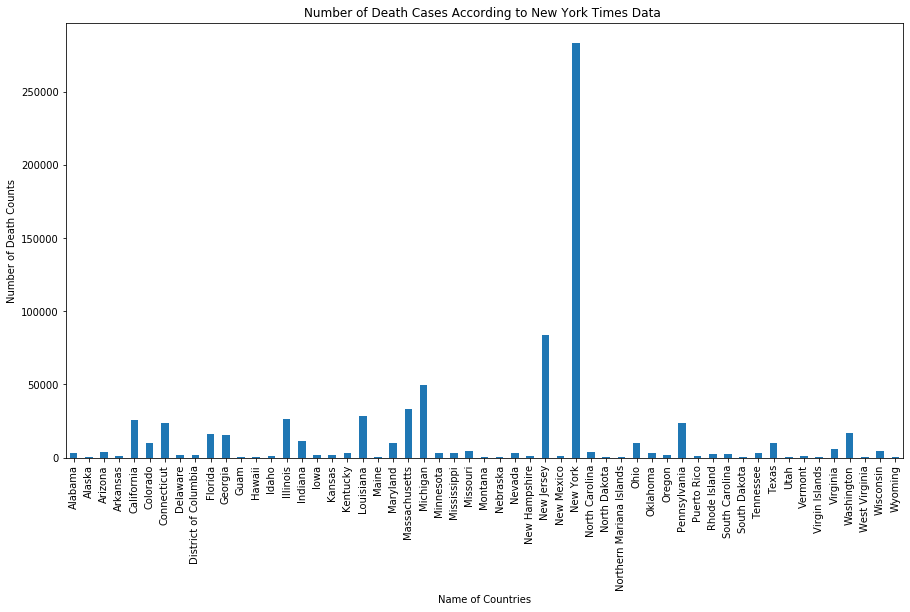

In [12]:
state_death_count=new_york_times.groupby('state')['deaths'].sum()
plot1=state_death_count.plot.bar(figsize=(15,8))
plot1.set_title('Number of Death Cases According to New York Times Data ')
plot1.set_ylabel('Number of Death Counts')
plot1.set_xlabel('Name of Countries')

Text(0, 0.5, 'Total Number Of Cases')

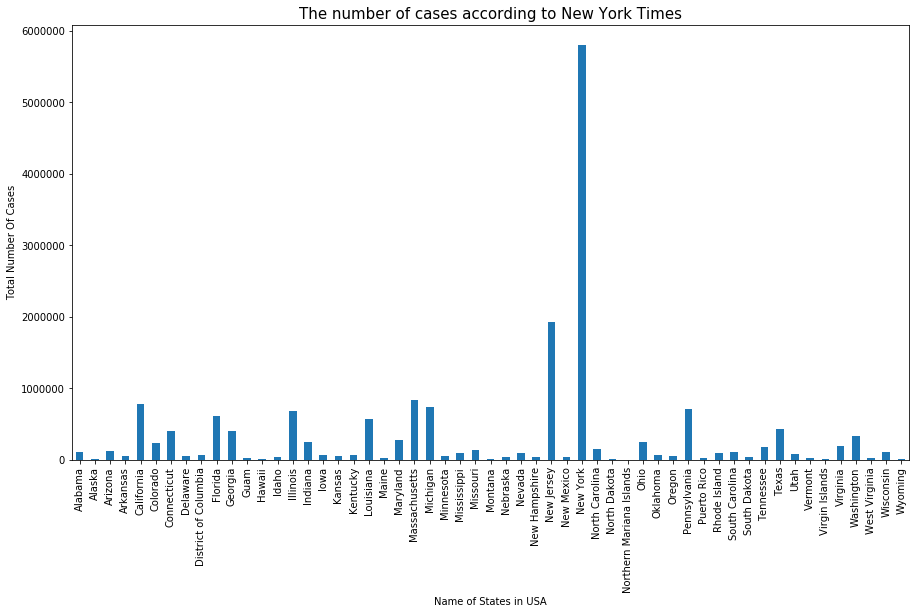

In [13]:
state_cases=new_york_times.groupby('state')['cases'].sum()
plot1=state_cases.plot.bar(figsize=(15,8))
plot1.set_title('The number of cases according to New York Times',size=15)
plot1.set_xlabel('Name of States in USA')
plot1.set_ylabel('Total Number Of Cases')

In [14]:
deaths=new_york_times.groupby(new_york_times['date'].dt.month)['cases'].sum()
deaths

date
1          41
2         736
3     1093593
4    16381537
Name: cases, dtype: int64

Text(0.5, 0, 'Months')

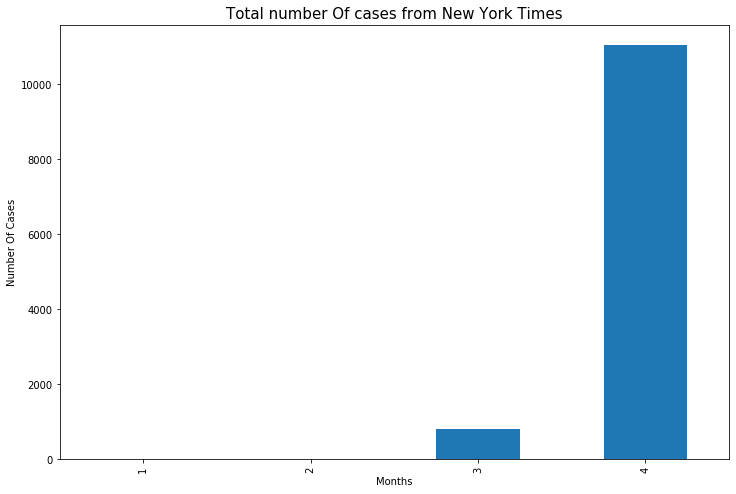

In [15]:
cases_over_time=new_york_times.groupby(new_york_times['date'].dt.month)['cases'].mean()
plot1=cases_over_time.plot.bar(figsize=(12,8))
plot1.set_title('Total number Of cases from New York Times',size=15)
plot1.set_ylabel('Number Of Cases')
plot1.set_xlabel('Months')

In [16]:
covid_19_data=pd.read_csv('covid_19_data.csv')
covid_19_data

SNo ObservationDate Province/State  Country/Region  \
0          1      01/22/2020          Anhui  Mainland China   
1          2      01/22/2020        Beijing  Mainland China   
2          3      01/22/2020      Chongqing  Mainland China   
3          4      01/22/2020         Fujian  Mainland China   
4          5      01/22/2020          Gansu  Mainland China   
...      ...             ...            ...             ...   
25577  25578      05/16/2020        Wyoming              US   
25578  25579      05/16/2020       Xinjiang  Mainland China   
25579  25580      05/16/2020          Yukon          Canada   
25580  25581      05/16/2020         Yunnan  Mainland China   
25581  25582      05/16/2020       Zhejiang  Mainland China   

               Last Update  Confirmed  Deaths  Recovered  
0          1/22/2020 17:00        1.0     0.0        0.0  
1          1/22/2020 17:00       14.0     0.0        0.0  
2          1/22/2020 17:00        6.0     0.0        0.0  
3          1/22/2020 17:00        1.0     0.0        0.0  
4          1/22/2020 17:00        0.0     0.0        0.0  
...                    ...        ...     ...        ...  
25577  2020-05-17 02:32:32      741.0     7.0        0.0  
25578  2020-05-17 02:32:32       76.0     3.0       73.0  
25579  2020-05-17 02:32:32       11.0     0.0       11.0  
25580  2020-05-17 02:32:32      185.0     2.0      183.0  
25581  2020-05-17 02:32:32     1268.0     1.0     1267.0  

[25582 rows x 8 columns]

Converted the data types to Integer from float so that it is easier and relatable to our analysis

In [17]:
covid_19_data['Recovered']=covid_19_data['Recovered'].astype('int64')
covid_19_data['Deaths']=covid_19_data['Deaths'].astype('int64')
covid_19_data['Confirmed']=covid_19_data['Confirmed'].astype('int64')

In [18]:
covid_19_data

SNo ObservationDate Province/State  Country/Region  \
0          1      01/22/2020          Anhui  Mainland China   
1          2      01/22/2020        Beijing  Mainland China   
2          3      01/22/2020      Chongqing  Mainland China   
3          4      01/22/2020         Fujian  Mainland China   
4          5      01/22/2020          Gansu  Mainland China   
...      ...             ...            ...             ...   
25577  25578      05/16/2020        Wyoming              US   
25578  25579      05/16/2020       Xinjiang  Mainland China   
25579  25580      05/16/2020          Yukon          Canada   
25580  25581      05/16/2020         Yunnan  Mainland China   
25581  25582      05/16/2020       Zhejiang  Mainland China   

               Last Update  Confirmed  Deaths  Recovered  
0          1/22/2020 17:00          1       0          0  
1          1/22/2020 17:00         14       0          0  
2          1/22/2020 17:00          6       0          0  
3          1/22/2020 17:00          1       0          0  
4          1/22/2020 17:00          0       0          0  
...                    ...        ...     ...        ...  
25577  2020-05-17 02:32:32        741       7          0  
25578  2020-05-17 02:32:32         76       3         73  
25579  2020-05-17 02:32:32         11       0         11  
25580  2020-05-17 02:32:32        185       2        183  
25581  2020-05-17 02:32:32       1268       1       1267  

[25582 rows x 8 columns]

In [19]:
number_of_confirmed_cases=covid_19_data.groupby('Country/Region')['Confirmed'].sum()
number_of_confirmed_cases.sort_values(ascending=False)

Country/Region
US                       41229508
Spain                     9670184
Italy                     9611750
Mainland China            7972075
Germany                   7256240
                           ...   
Republic of the Congo           1
North Ireland                   1
East Timor                      1
Channel Islands                 1
 Azerbaijan                     1
Name: Confirmed, Length: 223, dtype: int64

In [20]:
number_of_confirmed_cases_df=number_of_confirmed_cases.to_frame().reset_index()
number_of_confirmed_cases_df.columns=['Country/Region','Confirmed']

In [21]:
cases=number_of_confirmed_cases_df.sort_values(by='Confirmed',ascending=False)
fig=px.bar(cases,x='Country/Region',y='Confirmed', 
             log_y=True, template='ggplot2', title='Display of Confirmed Cases largest to smallest')
fig.show()

In [24]:
top_5_countries=cases.head()
top_5_countries

Country/Region  Confirmed
208              US   41229508
188           Spain    9670184
101           Italy    9611750
124  Mainland China    7972075
76          Germany    7256240

Number Of Active Cases

In [22]:
covid_19_data_cases=covid_19_data.groupby('Country/Region')[['Confirmed','Deaths','Recovered']].max()
covid_19_data_cases=covid_19_data_cases.reset_index()
covid_19_data_cases['Active']=covid_19_data_cases['Confirmed']-covid_19_data_cases['Deaths']-covid_19_data_cases['Recovered']
covid_19_data_cases['Country']=covid_19_data_cases['Country/Region']
covid_19_data_cases
fig = px.scatter_geo(covid_19_data_cases, locations="Country", locationmode='country names', 
                     color="Active", hover_name="Country/Region",hover_data = [covid_19_data_cases.Recovered,covid_19_data_cases.Deaths,covid_19_data_cases.Active],projection="natural earth",
                     width=1000, height=700,
                     color_continuous_scale='Reds',
                     range_color=[1000,50000],

                     title='World Map of Coronavirus')
fig.update(layout_coloraxis_showscale=True)
py.offline.iplot(fig)

In [23]:
covid_19_data['ObservationDate']=pd.to_datetime(covid_19_data['ObservationDate'])

In [24]:
covid_19_data['ObservationDate'].dtype

dtype('<M8[ns]')

In [25]:
number_of_death_cases_time=covid_19_data.groupby(covid_19_data['ObservationDate'].dt.month)['Deaths'].sum()
number_of_recovered_cases_time=covid_19_data.groupby(covid_19_data['ObservationDate'].dt.month)['Recovered'].sum()
number_of_confirmed_cases=covid_19_data.groupby(covid_19_data['ObservationDate'].dt.month)['Confirmed'].sum()

Text(0.5, 1.0, 'Number Of Confirmed Cases')

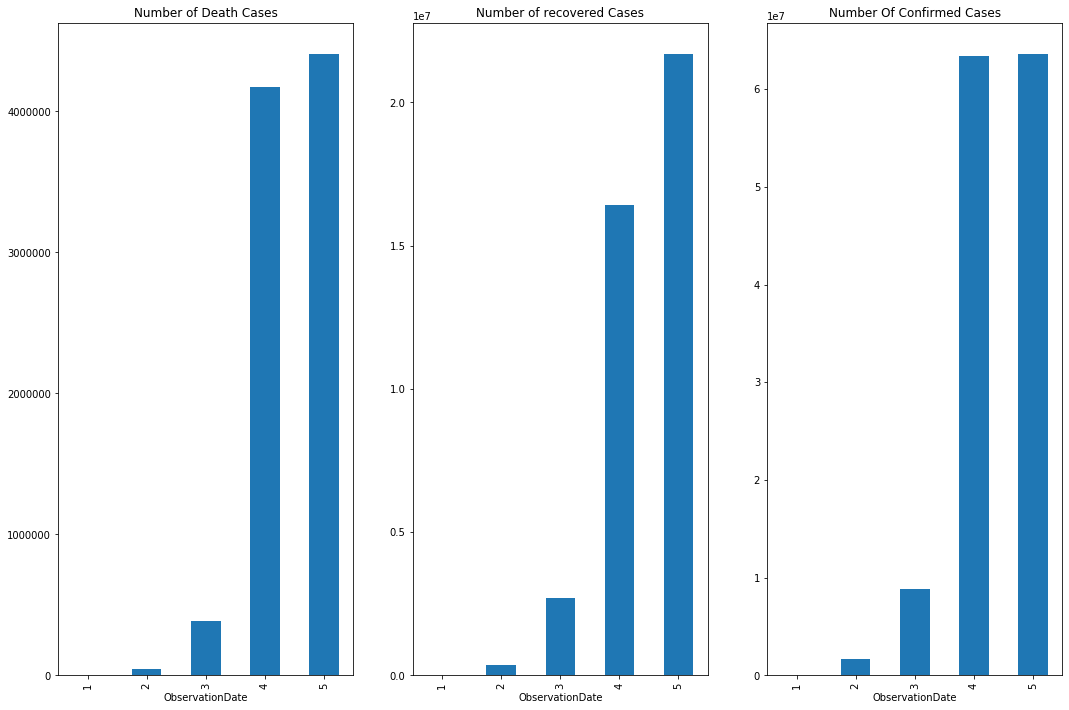

In [26]:
fig,axes=plt.subplots(1,3,figsize=(18,12))
plot1=number_of_death_cases_time.plot.bar(ax=axes[0])
plot1.set_title('Number of Death Cases')
plot2=number_of_recovered_cases_time.plot.bar(ax=axes[1])
plot2.set_title('Number of recovered Cases')
plot3=number_of_confirmed_cases.plot.bar(ax=axes[2])
plot3.set_title('Number Of Confirmed Cases')

In [27]:
number_of_confirmed_cases

ObservationDate
1       38535
2     1671959
3     8894726
4    63402512
5    63593481
Name: Confirmed, dtype: int64

In [28]:
covid_19_data['Recovered'].dtype

dtype('int64')

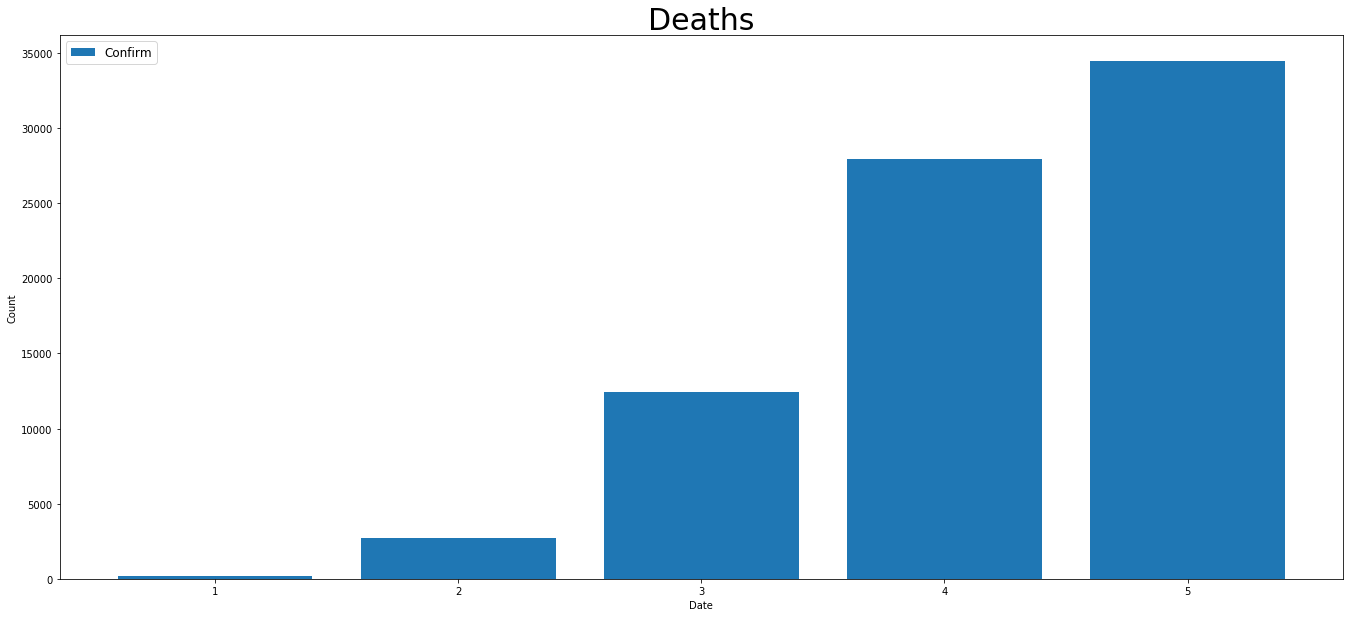

In [29]:
plt.figure(figsize=(23,10))
plt.bar(covid_19_data['ObservationDate'].dt.month,covid_19_data.Confirmed,label="Confirm")
plt.xlabel('Date')
plt.ylabel("Count")
plt.legend(frameon=True, fontsize=12)
plt.title('Confrim',fontsize=30)
plt.show()


plt.figure(figsize=(23,10))
plt.bar(covid_19_data['ObservationDate'].dt.month,covid_19_data.Deaths,label="Confirm")
plt.xlabel('Date')
plt.ylabel("Count")
plt.legend(frameon=True, fontsize=12)
plt.title('Deaths',fontsize=30)
plt.show()

plt.figure(figsize=(23,10))
plt.bar(covid_19_data['ObservationDate'].dt.month,covid_19_data.Deaths,label="Recovered")
plt.xlabel('Date')
plt.ylabel("Count")
plt.legend(frameon=True, fontsize=12)
plt.title('Recovered',fontsize=30)
plt.show()

In [73]:
plt.figure(figsize=(23,10))
covid_19_data['ObservationDate']=pd.to_datetime(covid_19_data['ObservationDate'])
plt.bar(covid_19_data['ObservationDate'].dt.month, covid_19_data.Confirmed,label="Confirm")
plt.bar(covid_19_data['ObservationDate'].dt.month, covid_19_data.Recovered,label="Recovery")
plt.bar(covid_19_data['ObservationDate'].dt.month, covid_19_data.Deaths,label="Death")
plt.xlabel('Date')
plt.ylabel("Count")
plt.legend(frameon=True, fontsize=12)
plt.title('Confrim vs Recovery vs Death Cases',fontsize=30)
plt.show()

In [31]:
patients=pd.read_csv('PatientInfo.csv')
patients2=pd.read_csv('patient.csv')
patients.isnull().sum()

patient_id               0
global_num            1131
sex                    158
birth_year             544
age                    166
country                  0
province                 0
city                    79
disease               3501
infection_case         770
infection_order       3488
infected_by           2683
contact_number        2871
symptom_onset_date    3024
confirmed_date           3
released_date         2162
deceased_date         3457
state                    0
dtype: int64

In [32]:
patients.dropna(subset=['sex'],inplace=True)

In [33]:
patients.isnull().sum()

patient_id               0
global_num            1121
sex                      0
birth_year             387
age                     10
country                  0
province                 0
city                    76
disease               3343
infection_case         765
infection_order       3330
infected_by           2532
contact_number        2718
symptom_onset_date    2879
confirmed_date           3
released_date         2004
deceased_date         3299
state                    0
dtype: int64

In [34]:
sex_infected=patients['sex'].value_counts()
sex_infected_df=sex_infected.to_frame().reset_index()
sex_infected_df.columns=['Sex','Counts']
sex_infected_df
fig=px.bar(sex_infected_df,x='Sex',y='Counts', 
             log_y=True, template='ggplot2', title='Display of Cases according to Sex')
fig.show()

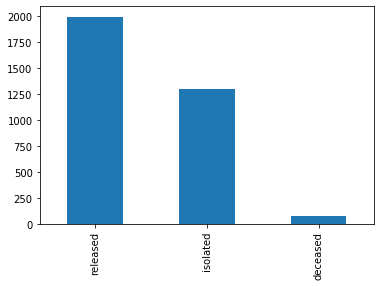

In [35]:
patients_state=patients[(patients['state']=='released')|(patients['state']=='deceased')|(patients['state']=='isolated')]
patients_state['state'].value_counts().plot.bar()

In [36]:
released_patients=patients[(patients['state']=='released')]
deceased_patients=patients[(patients['state']=='deceased')]
isolated_patients=patients[(patients['state']=='isolated')]

Text(0.5, 0, 'sex')

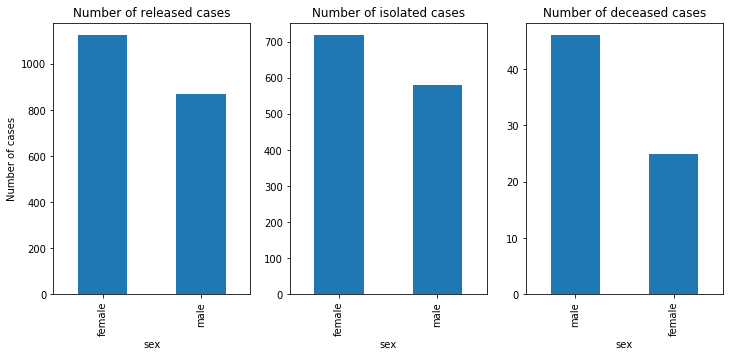

In [37]:
fig,axes=plt.subplots(1,3,figsize=(12,5))
plot1=released_patients['sex'].value_counts().plot.bar(ax=axes[0])
plot2=isolated_patients['sex'].value_counts().plot.bar(ax=axes[1])
plot3=deceased_patients['sex'].value_counts().plot.bar(ax=axes[2])

plot1.set_title('Number of released cases')
plot1.set_xlabel('sex')
plot1.set_ylabel('Number of cases')

plot2.set_title('Number of isolated cases')
plot2.set_xlabel('sex')

plot3.set_title('Number of deceased cases')
plot3.set_xlabel('sex')



In [38]:
#Finding the patients reason for spread of virus from patient.csv

patients2.dropna(subset=['infection_reason'],inplace=True)
patients2.isnull().sum()

id                    0
sex                   1
birth_year            6
country               0
region                0
group                99
infection_reason      0
infection_order     105
infected_by          72
contact_number      100
confirmed_date        0
released_date       111
deceased_date       139
state                 0
dtype: int64

In [39]:
plt1=patients2['infection_reason'].value_counts().plot.bar();
plt1.set_title('Infection Reason')

Text(0.5, 1.0, 'Infection Reason')

In [40]:
confirmed_cases=covid_19_data.pivot_table('Confirmed',columns=covid_19_data['ObservationDate'].dt.month,index='Country/Region')
result=confirmed_cases.sum()
plresult=result.sort_values(ascending=False)

df=plresult.to_frame().reset_index()
df.columns=['Observation Date','Confirmed']


fig=px.bar(df,x='Observation Date',y='Confirmed', 
             log_y=True, template='ggplot2', title='Display of Confirmed Cases from January to May')
fig.show()



Analysis Of Data with USA and the World for Confirmed Cases

In [41]:
usa_state_level=pd.read_csv('covid-statistics-by-us-states-daily-updates.csv')
usa_state_level

date state  positive  negative  pending  hospitalizedcurrently  \
0     2020-04-28    AK     351.0   16738.0      NaN                   16.0   
1     2020-04-28    AL    6687.0   69140.0      NaN                    NaN   
2     2020-04-28    AR    3111.0   37560.0      NaN                  104.0   
3     2020-04-28    AS       0.0       3.0     17.0                    NaN   
4     2020-04-28    AZ    6948.0   60490.0      NaN                  737.0   
...          ...   ...       ...       ...      ...                    ...   
3036  2020-01-26    WA       1.0       NaN      NaN                    NaN   
3037  2020-01-25    WA       1.0       NaN      NaN                    NaN   
3038  2020-01-24    WA       1.0       NaN      NaN                    NaN   
3039  2020-01-23    WA       1.0       NaN      NaN                    NaN   
3040  2020-01-22    WA       1.0       NaN      NaN                    NaN   

      hospitalizedcumulative  inicucurrently  inicucumulative  \
0                        NaN             NaN              NaN   
1                      911.0             NaN            335.0   
2                        NaN             NaN              NaN   
3                        NaN             NaN              NaN   
4                     1095.0           303.0              NaN   
...                      ...             ...              ...   
3036                     NaN             NaN              NaN   
3037                     NaN             NaN              NaN   
3038                     NaN             NaN              NaN   
3039                     NaN             NaN              NaN   
3040                     NaN             NaN              NaN   

      onventilatorcurrently  ...  hospitalized    total totaltestresults  \
0                       NaN  ...           NaN  17089.0          17089.0   
1                       NaN  ...         911.0  75827.0          75827.0   
2                      20.0  ...           NaN  40671.0          40671.0   
3                       NaN  ...           NaN     20.0              3.0   
4                     193.0  ...        1095.0  67438.0          67438.0   
...                     ...  ...           ...      ...              ...   
3036                    NaN  ...           NaN      1.0              1.0   
3037                    NaN  ...           NaN      1.0              1.0   
3038                    NaN  ...           NaN      1.0              1.0   
3039                    NaN  ...           NaN      1.0              1.0   
3040                    NaN  ...           NaN      1.0              1.0   

       posneg  fips  deathincrease  hospitalizedincrease  negativeincrease  \
0     17089.0     2            0.0                   0.0             827.0   
1     75827.0     1           20.0                  39.0            1642.0   
2     40671.0     5            2.0                   0.0             120.0   
3         3.0    60            0.0                   0.0               0.0   
4     67438.0     4           18.0                  44.0             663.0   
...       ...   ...            ...                   ...               ...   
3036      1.0    53            0.0                   0.0               0.0   
3037      1.0    53            0.0                   0.0               0.0   
3038      1.0    53            0.0                   0.0               0.0   
3039      1.0    53            0.0                   0.0               0.0   
3040      1.0    53            NaN                   NaN               NaN   

      positiveincrease  totaltestresultsincrease  
0                  6.0                     833.0  
1                188.0                    1830.0  
2                 94.0                     214.0  
3                  0.0                       0.0  
4                232.0                     895.0  
...                ...                       ...  
3036               0.0                       0.0  
3037               0.0              

In [42]:
usa_state_level.isnull().sum()

date                           0
state                          0
positive                      15
negative                     181
pending                     2395
hospitalizedcurrently       2042
hospitalizedcumulative      1960
inicucurrently              2549
inicucumulative             2849
onventilatorcurrently       2652
onventilatorcumulative      2984
recovered                   2197
hash                           0
datechecked                    0
death                        727
hospitalized                1960
total                          2
totaltestresults               2
posneg                         2
fips                           0
deathincrease                 56
hospitalizedincrease          56
negativeincrease              56
positiveincrease              56
totaltestresultsincrease      56
dtype: int64

In [43]:
usa_state_level.dropna(subset=['death','total','totaltestresults','recovered'],inplace=True)

In [44]:
usa_state_level.isnull().sum()

date                          0
state                         0
positive                      0
negative                      0
pending                     735
hospitalizedcurrently       272
hospitalizedcumulative      311
inicucurrently              556
inicucumulative             751
onventilatorcurrently       629
onventilatorcumulative      803
recovered                     0
hash                          0
datechecked                   0
death                         0
hospitalized                311
total                         0
totaltestresults              0
posneg                        0
fips                          0
deathincrease                 0
hospitalizedincrease          0
negativeincrease              0
positiveincrease              0
totaltestresultsincrease      0
dtype: int64

In [45]:
for i in['positive','negative','death','recovered','totaltestresults','total']:
    usa_state_level[i]=usa_state_level[i].astype(int)
    
usa_state_level

date state  positive  negative  pending  hospitalizedcurrently  \
0     2020-04-28    AK       351     16738      NaN                   16.0   
2     2020-04-28    AR      3111     37560      NaN                  104.0   
4     2020-04-28    AZ      6948     60490      NaN                  737.0   
6     2020-04-28    CO     13879     52462      NaN                  994.0   
8     2020-04-28    DC      3994     14891      NaN                    NaN   
...          ...   ...       ...       ...      ...                    ...   
1857  2020-03-26    DE       130        36      NaN                   13.0   
1862  2020-03-26    IA       179      2578      NaN                   31.0   
1893  2020-03-26    SD        46      1973    125.0                    NaN   
1906  2020-03-25    AR       280      1437      NaN                   22.0   
1929  2020-03-25    MN       287     11188      NaN                   26.0   

      hospitalizedcumulative  inicucurrently  inicucumulative  \
0                        NaN             NaN              NaN   
2                        NaN             NaN              NaN   
4                     1095.0           303.0              NaN   
6                     2485.0             NaN              NaN   
8                        NaN             NaN              NaN   
...                      ...             ...              ...   
1857                     NaN             NaN              NaN   
1862                    46.0             NaN              NaN   
1893                     NaN             NaN              NaN   
1906                     NaN             NaN              NaN   
1929                    35.0             NaN              NaN   

      onventilatorcurrently  ...  hospitalized  total totaltestresults  \
0                       NaN  ...           NaN  17089            17089   
2                      20.0  ...           NaN  40671            40671   
4                     193.0  ...        1095.0  67438            67438   
6                       NaN  ...        2485.0  66341            66341   
8                       NaN  ...           NaN  18885            18885   
...                     ...  ...           ...    ...              ...   
1857                    NaN  ...           NaN    166              166   
1862                    NaN  ...          46.0   2757             2757   
1893                    NaN  ...           NaN   2144             2019   
1906                    4.0  ...           NaN   1717             1717   
1929                    NaN  ...          35.0  11475            11475   

       posneg  fips  deathincrease  hospitalizedincrease  negativeincrease  \
0     17089.0     2            0.0                   0.0             827.0   
2     40671.0     5            2.0                   0.0             120.0   
4     67438.0     4           18.0                  44.0             663.0   
6     66341.0     8           26.0                  47.0            2629.0   
8     18885.0    11            5.0                   0.0             367.0   
...       ...   ...            ...                   ...               ...   
1857    166.0    10            1.0                   0.0               0.0   
1862   2757.0    19            0.0                  10.0               0.0   
1893   2019.0    46            0.0                   0.0            1154.0   
1906   1717.0     5            2.0                   0.0             490.0   
1929  11475.0    27            0.0                  14.0            5638.0   

      positiveincrease  totaltestresultsincrease  
0                  6.0                     833.0  
2                 94.0                     214.0  
4                232.0                     895.0  
6                438.0                    3067.0  
8                102.0                     469.0  
...                ...                       ...  
1857              15.0                      15.0  
1862              34.0                      34.0  
1893     

In [46]:
usa_state_level['date'].dtype

dtype('O')

In [47]:
usa_state_level['date']=pd.to_datetime(usa_state_level['date'])

In [48]:
usa_state_level['date'].dtype

dtype('<M8[ns]')

In [49]:
cases_counts=usa_state_level.groupby('state')['totaltestresults','positive','negative'].max().reset_index()
cases_counts

state  totaltestresults  positive  negative
0     AK             17089       351     16738
1     AR             40671      3111     37560
2     AZ             67438      6948     60490
3     CO             66341     13879     52462
4     DC             18885      3994     14891
5     DE             21180      4575     16605
6     GU              1683       145      1538
7     HI             29183       607     28576
8     IA             39823      6376     33447
9     ID             20052      1917     18135
10    KY             48799      4146     44653
11    LA            151108     27286    123822
12    MD            107785     20113     87672
13    ME             17824      1040     16784
14    MI            164805     39262    125543
15    MN             63829      4181     59648
16    MP                65        14        51
17    MT             13191       451     12740
18    ND             23723       991     22732
19    NH             20145      1938     18207
20    NJ            234359    113856    120503
21    NM             58803      2823     55980
22    NY            844994    295106    549888
23    OK             59699      3410     56289
24    RI             57693      7926     49767
25    SC             52145      5613     46532
26    SD             16612      2313     14299
27    TN            161928     10052    151876
28    TX            300384     26171    274213
29    UT            102439      4343     98096
30    VA             82753     13794     68959
31    VI               778        59       719
32    VT             12981       816     12165
33    WV             43055      1079     41976
34    WY              8615       389      8226

In [50]:
cases_counts
cases_counts=usa_state_level.groupby('state')['totaltestresults','positive','negative'].max().reset_index()
cases_counts
import plotly.express as ex

fig=px.bar(cases_counts,x='totaltestresults',y='state',color='state', 
             title='State Wise Testing', orientation='h', text='totaltestresults', 
             height=900,color_discrete_sequence = ex.colors.cyclical.Edge)
fig.update_layout(plot_bgcolor='rgb(275, 270, 273)')
#fig.update_layout(template = 'plotly_white')
fig.show()

In [51]:
time_date=usa_state_level.groupby('state')['totaltestresults','death','recovered','hospitalized'].sum().reset_index()
time_date

fig=px.scatter(time_date,x='recovered',y='state',color='recovered',size='recovered', hover_data=['recovered'],
                 color_discrete_sequence = ex.colors.cyclical.IceFire)
fig.update_layout(title_text='Trend of Recovered Cases in USA',
                  plot_bgcolor='rgb(275, 270, 273)',width=600, height=600)
fig.show()

In [52]:
usa_filter=covid_19_data[covid_19_data['Country/Region']=='US']
usa_filter

SNo ObservationDate Province/State Country/Region  \
31        32      2020-01-22     Washington             US   
69        70      2020-01-23     Washington             US   
117      118      2020-01-24     Washington             US   
118      119      2020-01-24        Chicago             US   
158      159      2020-01-25     Washington             US   
...      ...             ...            ...            ...   
25572  25573      2020-05-16       Virginia             US   
25573  25574      2020-05-16     Washington             US   
25574  25575      2020-05-16  West Virginia             US   
25576  25577      2020-05-16      Wisconsin             US   
25577  25578      2020-05-16        Wyoming             US   

               Last Update  Confirmed  Deaths  Recovered  
31         1/22/2020 17:00          1       0          0  
69           1/23/20 17:00          1       0          0  
117          1/24/20 17:00          1       0          0  
118          1/24/20 17:00          1       0          0  
158          1/25/20 17:00          1       0          0  
...                    ...        ...     ...        ...  
25572  2020-05-17 02:32:32      29683    1003          0  
25573  2020-05-17 02:32:32      18288     999          0  
25574  2020-05-17 02:32:32       1470      64          0  
25576  2020-05-17 02:32:32      12187     453          0  
25577  2020-05-17 02:32:32        741       7          0  

[4816 rows x 8 columns]

In [53]:
usa_filter['ObservationDate']=pd.to_datetime(usa_filter['ObservationDate'])
united_states=usa_filter.groupby([usa_filter['ObservationDate'].dt.month,'Province/State'])['Deaths'].sum().reset_index()
united_states

C:\Users\grees\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



ObservationDate Province/State  Deaths
0                  1        Arizona       0
1                  1     California       0
2                  1        Chicago       0
3                  1       Illinois       0
4                  1     Washington       0
..               ...            ...     ...
333                5       Virginia   12822
334                5     Washington   14563
335                5  West Virginia     855
336                5      Wisconsin    6191
337                5        Wyoming     112

[338 rows x 3 columns]

In [54]:
fig = px.scatter(united_states, x="ObservationDate", y="Province/State", color="Deaths",
                 size='Deaths', hover_data=['Deaths'],
                 color_discrete_sequence = ex.colors.cyclical.IceFire)
fig.update_layout(title_text='Trend of Death Cases in US',
                  plot_bgcolor='rgb(275, 270, 273)',width=600, height=600)
fig.show()

In [55]:
positive_cases_trend=usa_filter.groupby('ObservationDate')['Confirmed'].sum().reset_index()
positive_cases_trend

ObservationDate  Confirmed
0        2020-01-22          1
1        2020-01-23          1
2        2020-01-24          2
3        2020-01-25          2
4        2020-01-26          5
..              ...        ...
111      2020-05-12    1369574
112      2020-05-13    1390406
113      2020-05-14    1417774
114      2020-05-15    1442824
115      2020-05-16    1467820

[116 rows x 2 columns]

In [56]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=usa_filter['ObservationDate'].dt.date, y=usa_filter['Confirmed'],
                    mode='lines+markers',marker_color='blue'))
fig.update_layout(title_text = 'Trend of Positive case ratio from tested people of USA')
fig.update_layout(plot_bgcolor='rgb(275, 270, 273)',width=600, height=600)
fig.show()

In [57]:
usa_filter

SNo ObservationDate Province/State Country/Region  \
31        32      2020-01-22     Washington             US   
69        70      2020-01-23     Washington             US   
117      118      2020-01-24     Washington             US   
118      119      2020-01-24        Chicago             US   
158      159      2020-01-25     Washington             US   
...      ...             ...            ...            ...   
25572  25573      2020-05-16       Virginia             US   
25573  25574      2020-05-16     Washington             US   
25574  25575      2020-05-16  West Virginia             US   
25576  25577      2020-05-16      Wisconsin             US   
25577  25578      2020-05-16        Wyoming             US   

               Last Update  Confirmed  Deaths  Recovered  
31         1/22/2020 17:00          1       0          0  
69           1/23/20 17:00          1       0          0  
117          1/24/20 17:00          1       0          0  
118          1/24/20 17:00          1       0          0  
158          1/25/20 17:00          1       0          0  
...                    ...        ...     ...        ...  
25572  2020-05-17 02:32:32      29683    1003          0  
25573  2020-05-17 02:32:32      18288     999          0  
25574  2020-05-17 02:32:32       1470      64          0  
25576  2020-05-17 02:32:32      12187     453          0  
25577  2020-05-17 02:32:32        741       7          0  

[4816 rows x 8 columns]

In [58]:

usa_state_level['date']=usa_state_level['date'].astype(str)
fig = px.scatter(usa_state_level, x="total", y="positive", animation_frame="date", animation_group="state",
           size="positive", color="state", hover_name="state",
           log_x=False, size_max=55, range_x=[0,200000], range_y=[0,55000])

layout = go.Layout(
    title=go.layout.Title(
        text="Total testing counts Vs Positive Counts over time ",
        x=0.5
    ),
    font=dict(size=14),
#     width=800,
#     height=500,
    xaxis_title = "Total number of tests",
    yaxis_title = "Number of positive tests"
)

fig.update_layout(layout)
fig.show()

In [61]:
usa_country=covid_19_data[covid_19_data['Country/Region']=='US']
usa_country

SNo ObservationDate Province/State Country/Region  \
31        32      2020-01-22     Washington             US   
69        70      2020-01-23     Washington             US   
117      118      2020-01-24     Washington             US   
118      119      2020-01-24        Chicago             US   
158      159      2020-01-25     Washington             US   
...      ...             ...            ...            ...   
25572  25573      2020-05-16       Virginia             US   
25573  25574      2020-05-16     Washington             US   
25574  25575      2020-05-16  West Virginia             US   
25576  25577      2020-05-16      Wisconsin             US   
25577  25578      2020-05-16        Wyoming             US   

               Last Update  Confirmed  Deaths  Recovered  
31         1/22/2020 17:00          1       0          0  
69           1/23/20 17:00          1       0          0  
117          1/24/20 17:00          1       0          0  
118          1/24/20 17:00          1       0          0  
158          1/25/20 17:00          1       0          0  
...                    ...        ...     ...        ...  
25572  2020-05-17 02:32:32      29683    1003          0  
25573  2020-05-17 02:32:32      18288     999          0  
25574  2020-05-17 02:32:32       1470      64          0  
25576  2020-05-17 02:32:32      12187     453          0  
25577  2020-05-17 02:32:32        741       7          0  

[4816 rows x 8 columns]

In [62]:

usa_country['ObservationDate']=usa_country['ObservationDate'].astype(str)


usa_country_deathvsconfirmed=usa_country.groupby('Province/State')['Deaths','Confirmed'].sum().reset_index()
usa_country_deathvsconfirmed

fig = px.scatter(usa_country_deathvsconfirmed, x="Confirmed", y="Deaths", animation_frame="Deaths", animation_group="Province/State",
           size="Confirmed", color="Province/State", hover_name="Province/State",
           log_x=False, size_max=55, range_x=[0,200000], range_y=[0,55000])

layout = go.Layout(
    title=go.layout.Title(
        text="Total Cases of Confirmed Cases vs Death Cases for each state in the USA ",
        x=0.5
    ),
    font=dict(size=14),
#     width=800,
#     height=500,
    xaxis_title = "Total number of Confirmed Cases",
    yaxis_title = "Total Number of Death cases"
)

fig.update_layout(layout)
fig.show()

C:\Users\grees\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Continent wise analysis on the data

In [63]:
continent_data=pd.read_csv('current-data-on-the-geographic-distribution-of-covid-19-cases-worldwide.csv')
continent_data.isnull().sum()

daterep                    13623
day                            0
month                          0
year                           0
cases                          0
deaths                         0
countriesandterritories        0
geoid                         45
countryterritorycode         152
popdata2018                  126
continentexp                   0
dtype: int64

In [64]:
continent_data.drop(columns='daterep',inplace=True)

In [65]:
continent_data

day  month  year  cases  deaths countriesandterritories geoid  \
0       28      4  2020    172       0             Afghanistan    AF   
1       27      4  2020     68      10             Afghanistan    AF   
2       26      4  2020    112       4             Afghanistan    AF   
3       25      4  2020     70       1             Afghanistan    AF   
4       24      4  2020    105       2             Afghanistan    AF   
...    ...    ...   ...    ...     ...                     ...   ...   
13618   25      3  2020      0       0                Zimbabwe    ZW   
13619   24      3  2020      0       1                Zimbabwe    ZW   
13620   23      3  2020      0       0                Zimbabwe    ZW   
13621   22      3  2020      1       0                Zimbabwe    ZW   
13622   21      3  2020      1       0                Zimbabwe    ZW   

      countryterritorycode  popdata2018 continentexp  
0                      AFG   37172386.0         Asia  
1                      AFG   37172386.0         Asia  
2                      AFG   37172386.0         Asia  
3                      AFG   37172386.0         Asia  
4                      AFG   37172386.0         Asia  
...                    ...          ...          ...  
13618                  ZWE   14439018.0       Africa  
13619                  ZWE   14439018.0       Africa  
13620                  ZWE   14439018.0       Africa  
13621                  ZWE   14439018.0       Africa  
13622                  ZWE   14439018.0       Africa  

[13623 rows x 10 columns]

In [66]:
continent_cases=continent_data.groupby('continentexp')['cases'].sum()
continent_cases=continent_cases.reset_index()


fig=px.bar(continent_cases,x='continentexp',y='cases', 
             log_y=True, template='ggplot2', title='Display of the number of Confirmed cases for different Continents')
fig.show()


Display of the death and confirmed cases in different continents


In [67]:
continent_cases=continent_data.groupby('continentexp')['cases','deaths'].sum()
continent_cases=continent_cases.reset_index()

fig = go.Figure(data=[
    go.Bar(name='cases', x=continent_cases['continentexp'], y=continent_cases['cases'], 
           text=continent_cases['cases'], texttemplate='%{text:.2s}', textposition='outside'),
    go.Bar(name='deaths', x=continent_cases['continentexp'], y=continent_cases['deaths'], 
           text=continent_cases['deaths'], texttemplate='%{text:.2s}', textposition='outside'),
    
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.update_layout(legend_orientation="h", legend=dict(x=0, y=1.1))
fig.update_layout(margin={"r":0,"l":0,"b":0, "t":0})
fig.show()

In [68]:
continent_data['mortality_rate']=continent_data['deaths']/(continent_data['cases']+1)*100

In [69]:
continent_data

day  month  year  cases  deaths countriesandterritories geoid  \
0       28      4  2020    172       0             Afghanistan    AF   
1       27      4  2020     68      10             Afghanistan    AF   
2       26      4  2020    112       4             Afghanistan    AF   
3       25      4  2020     70       1             Afghanistan    AF   
4       24      4  2020    105       2             Afghanistan    AF   
...    ...    ...   ...    ...     ...                     ...   ...   
13618   25      3  2020      0       0                Zimbabwe    ZW   
13619   24      3  2020      0       1                Zimbabwe    ZW   
13620   23      3  2020      0       0                Zimbabwe    ZW   
13621   22      3  2020      1       0                Zimbabwe    ZW   
13622   21      3  2020      1       0                Zimbabwe    ZW   

      countryterritorycode  popdata2018 continentexp  mortality_rate  
0                      AFG   37172386.0         Asia        0.000000  
1                      AFG   37172386.0         Asia       14.492754  
2                      AFG   37172386.0         Asia        3.539823  
3                      AFG   37172386.0         Asia        1.408451  
4                      AFG   37172386.0         Asia        1.886792  
...                    ...          ...          ...             ...  
13618                  ZWE   14439018.0       Africa        0.000000  
13619                  ZWE   14439018.0       Africa      100.000000  
13620                  ZWE   14439018.0       Africa        0.000000  
13621                  ZWE   14439018.0       Africa        0.000000  
13622                  ZWE   14439018.0       Africa        0.000000  

[13623 rows x 11 columns]

This plot is to determine the mortality rate,deaths and cases in each Continent

In [70]:
continent_cases=continent_data.groupby('continentexp')['cases','deaths','mortality_rate'].sum()
continent_cases=continent_cases.reset_index()

fig = go.Figure(data=[
    go.Bar(name='cases', x=continent_cases['continentexp'], y=continent_cases['cases'], 
           text=continent_cases['cases'], texttemplate='%{text:.2s}', textposition='outside'),
    go.Bar(name='deaths', x=continent_cases['continentexp'], y=continent_cases['deaths'], 
           text=continent_cases['deaths'], texttemplate='%{text:.2s}', textposition='outside'),
    go.Bar(name='mortality_rate', x=continent_cases['continentexp'], y=continent_cases['mortality_rate'], 
           text=continent_cases['mortality_rate'], texttemplate='%{text:.2s}', textposition='outside'),
    
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.update_layout(legend_orientation="h", legend=dict(x=0, y=1.1))
fig.update_layout(margin={"r":0,"l":0,"b":0, "t":0})
fig.show()

In [71]:
cases_increases=continent_data.groupby('month')['cases'].sum().reset_index()
cases_increases
death_increases=continent_data.groupby('month')['deaths'].sum().reset_index()
death_increases

month  deaths
0      1     213
1      2    2708
2      3   34355
3      4  172917
4     12       0

In [72]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(
    rows=2, cols=2,
    specs=[[{"type": "bar"}, {"type": "pie"}],
           [{"type": "pie"}, {"type": "bar"}]],
    subplot_titles=("Number Of Cases","Number of Cases from December to April","Number Of Deaths from December to April","Number of deaths"))


fig.add_trace(
    go.Bar(x=continent_cases['continentexp'],y=continent_cases['cases'], marker=dict(color="crimson"), showlegend=False)
)
    
fig.add_trace(go.Pie(labels=cases_increases['month'],values=cases_increases['cases'],hole=.35),
              row=1, col=2)

fig.add_trace(go.Pie(labels=death_increases['month'],values=death_increases['deaths'],hole=.35),
              row=2, col=1)

fig.add_trace(
    go.Bar(x=continent_cases['continentexp'],y=continent_cases['deaths'], marker=dict(color="crimson"), showlegend=False),
    row=2, col=2
)
fig.update_layout(height=700, showlegend=False)

fig.show()



The analysis done here are inspired by various resources on the internet.Thanks :)